# Question and Answer

# 1.What is Simple Linear Regression?

  >Simple Linear Regression is a statistical method used to model the relationship between two variables:

   >Independent variable (X)
   >Dependent variable (Y)

  >It assumes a linear relationship of the form: Y = β₀ + β₁X + ε
   Where:

   >β₀ is the intercept
   >β₁ is the slope
   >ε is the error term

  >The goal is to find the best-fitting line that minimizes the sum of squared errors between predicted and actual values.

# 2.What are the key assumptions of Simple Linear Regression?

  > the key assumptions of simple linear regression are:

   >Linearity: The relationship between X and Y is linear.
   >Independence: Observations are independent of each other.
   >Homoscedasticity: Constant variance of errors across all levels of X.
   >Normality of Errors: Residuals (errors) are normally distributed.
   >No Multicollinearity: Not applicable in simple regression but relevant in multiple regression.

# 3.What is heteroscedasticity, and why is it important to address in regression models?

  >Heteroscedasticity refers to the non-constant variance of residuals across the range of independent variables.

   >It violates the assumption of homoscedasticity.
   >Leads to biased standard errors, affecting hypothesis tests and confidence intervals.
   >Can be detected using residual plots or statistical tests like Breusch-Pagan.
   >Remedies include transforming variables or using robust standard errors.

# 4.What is Multiple Linear Regression?

  >Multiple Linear Regression models the relationship between one dependent variable and two or more independent variables. Formula:
  Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε It helps in understanding how multiple factors influence the outcome and allows for better prediction and control.

# 5.What is polynomial regression, and how does it differ from linear regression?

  >Polynomial Regression is a form of regression where the relationship between X and Y is modeled as an nth-degree polynomial.

  >Example:
  Y = β₀ + β₁X + β₂X² + ... + βₙXⁿ + ε Difference from Linear Regression:
   
   >Linear regression fits a straight line.

   >Polynomial regression fits a curve, allowing for more complex   relationships.




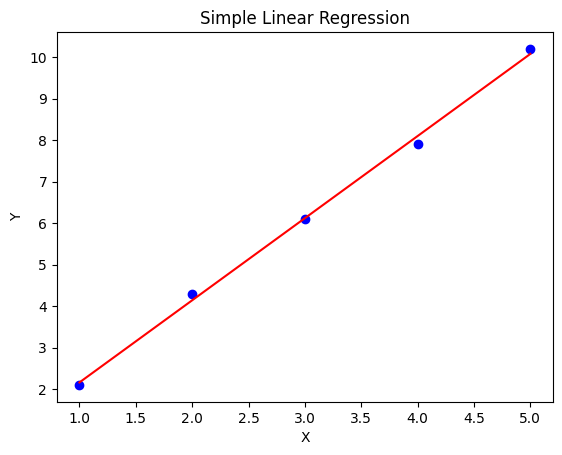

In [1]:
# 6.Implement a Python program to fit a Simple Linear Regression model to the following sample data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [2]:
# 7.Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
X = sm.add_constant(X)
y = data['Price']

model = sm.OLS(y, X).fit()
print(model.summary())

# VIF Calculation
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Wed, 27 Aug 2025   Prob (F-statistic):             0.0377
Time:                        15:09:01   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


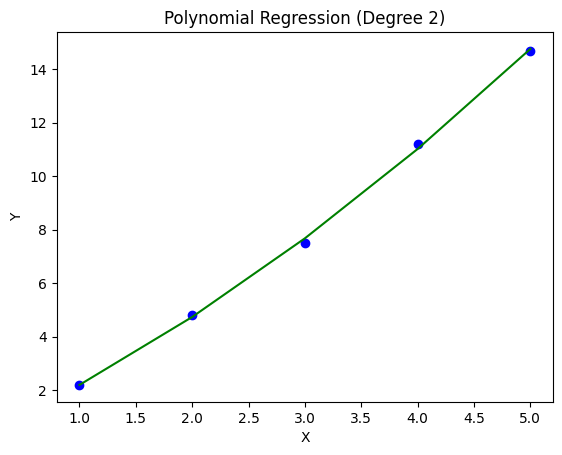

In [3]:
# 8.Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='green')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


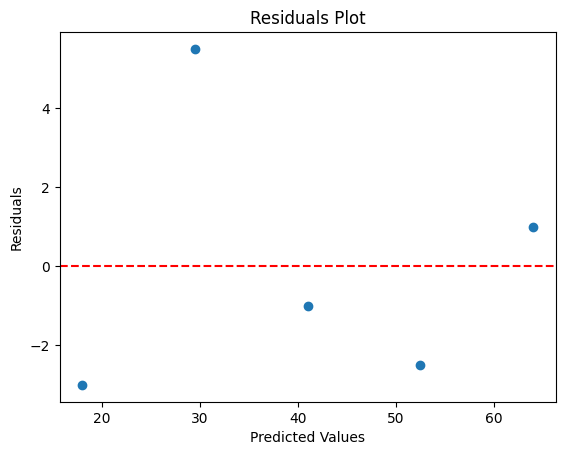

In [6]:
# 9.Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals.

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()



# Assessment: If residuals fan out or form a pattern, heteroscedasticity may be present.


# 10.Imagine you are a data scientist working for a real estate company. You
#need to predict house prices using features like area, number of rooms, and location.
#However, you detect heteroscedasticity and multicollinearity in your regression
#model. Explain the steps you would take to address these issues and ensure a robust
#model.


  >To ensure a robust model:

   >Heteroscedasticity Remedies:

   >Use log or square root transformations on dependent variable.

   >Apply weighted least squares or robust standard errors.

  >Multicollinearity Remedies:

   >Calculate VIF to identify correlated predictors.

   >Remove or combine highly correlated features.

   >Use Principal Component Analysis (PCA) or regularization techniques like Ridge/Lasso.

  >Model Validation:

   >Use cross-validation.

   >Check residual plots and performance metrics (R², RMSE).